In [115]:
import tweepy
import matplotlib
import time
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import matplotlib.pyplot as plt
import os
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)
BEARER_TOKEN = ''

In [34]:
client = tweepy.Client(bearer_token=BEARER_TOKEN, wait_on_rate_limit=True)
neuropsy_tweets = []


for response in tweepy.Paginator(client.search_all_tweets, 
                                 query = 'Neuropsychology neuropsychology -is:retweet lang:en',
                                 user_fields = ['username', 'public_metrics', 'description', 'location'],
                                 tweet_fields = ['created_at', 'geo', 'public_metrics', 'text'],
                                 expansions = 'author_id',
                                 start_time = '2022-06-02T00:00:00Z',
                                 end_time = '2022-07-01T00:00:00Z',
                              max_results=500):
    time.sleep(1)
    neuropsy_tweets.append(response)

In [35]:
result = []
user_dict = {}
# Loop through each response object
for response in neuropsy_tweets:
    # Take all of the users, and put them into a dictionary of dictionaries with the info we want to keep
    for user in response.includes['users']:
        user_dict[user.id] = {'username': user.username, 
                              'followers': user.public_metrics['followers_count'],
                              'tweets': user.public_metrics['tweet_count'],
                              'description': user.description,
                              'location': user.location
                             }
    for tweet in response.data:
        # For each tweet, find the author's information
        author_info = user_dict[tweet.author_id]
        # Put all of the information we want to keep in a single dictionary for each tweet
        result.append({'author_id': tweet.author_id, 
                       'username': author_info['username'],
                       'author_followers': author_info['followers'],
                       'author_tweets': author_info['tweets'],
                       'author_description': author_info['description'],
                       'author_location': author_info['location'],
                       'text': tweet.text,
                       'created_at': tweet.created_at,
                       'retweets': tweet.public_metrics['retweet_count'],
                       'replies': tweet.public_metrics['reply_count'],
                       'likes': tweet.public_metrics['like_count'],
                       'quote_count': tweet.public_metrics['quote_count']
                      })

# Change this list of dictionaries into a dataframe
df = pd.DataFrame(result)

In [36]:
df.head(5)

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count
0,569107992,SilkeLeFay,4740,37756,New Earth is a frequency spectrum reality that...,"Melbourne, Australia",#dementia #CVD #digitalhealth #aging #longevit...,2022-06-30 23:38:48+00:00,4,0,0,0
1,1241763596591300608,Find_Empathy,29,138,Therapists that Specialize in health,None,"My name is Dr. Meghan Beier, and I'm a clinica...",2022-06-30 23:23:33+00:00,0,0,1,0
2,55888987,schriAlphi,2238,62172,man will never swim. If God had wanted man to ...,"Community of Madrid, Spainn",say what? This is true? Well now isn't that a ...,2022-06-30 22:35:25+00:00,0,0,0,0
3,1199208013,RelativeChaff3,572,10323,If you're phobic towards any LGBTQ+ person and...,toronto,Sad I'm not taking that psycholinguistics cour...,2022-06-30 22:27:42+00:00,0,0,0,0
4,1534708496737918976,huberjp2,15,87,,None,8. Neuropsychology of Symbolic Representation ...,2022-06-30 22:02:06+00:00,0,0,0,0


In [40]:
df.to_csv('testing twitter6.csv', encoding='utf-8')

In [37]:
df.shape

(911, 12)

In [195]:
master_df = pd.DataFrame()

for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'):
        master_df = master_df.append(pd.read_csv(file))
master_df.to_csv('All tweets with neuropsy in 2022 first semester.csv', index=False)

In [197]:
df1 = pd.read_csv('All tweets with neuropsy in 2022 first semester.csv')
df1.index

RangeIndex(start=0, stop=4888, step=1)

In [198]:
df1.columns


Index(['Unnamed: 0', 'author_id', 'username', 'author_followers', 'author_tweets', 'author_description', 'author_location', 'text', 'created_at', 'retweets', 'replies', 'likes', 'quote_count'], dtype='object')

In [241]:
#Function to clean the text

def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text) #removing mentions@
    text = re.sub(r'#', '', text) # removing # symbol
    text = re.sub(r'https?:\/\/\S+', '', text) # removing hyperlinks
    text = re.sub(r'\b\w{1,5}\b', '', text)
    text = re.sub(r'\b(\w+\s)(\1+)', '\\1', text)
    
    return text

In [246]:
cleaned_df = df1['text'].apply(cleantext)
cleaned_df = pd.DataFrame(cleaned_df) 
pd.set_option('display.max_colwidth', None)
print(cleaned_df.index)
cleaned_df.head(3)


RangeIndex(start=0, stop=4888, step=1)


,text
0,’ living neuropsychology
1,( neuropsychology) Shifali! 🥳
2,"diagnosed August . \n , trained educated mental health professional, psychiatry, psychologist, neuropsychology diagnosis, reflect ."


In [334]:
earth_mask = np.array(Image.open('Earth.png'))

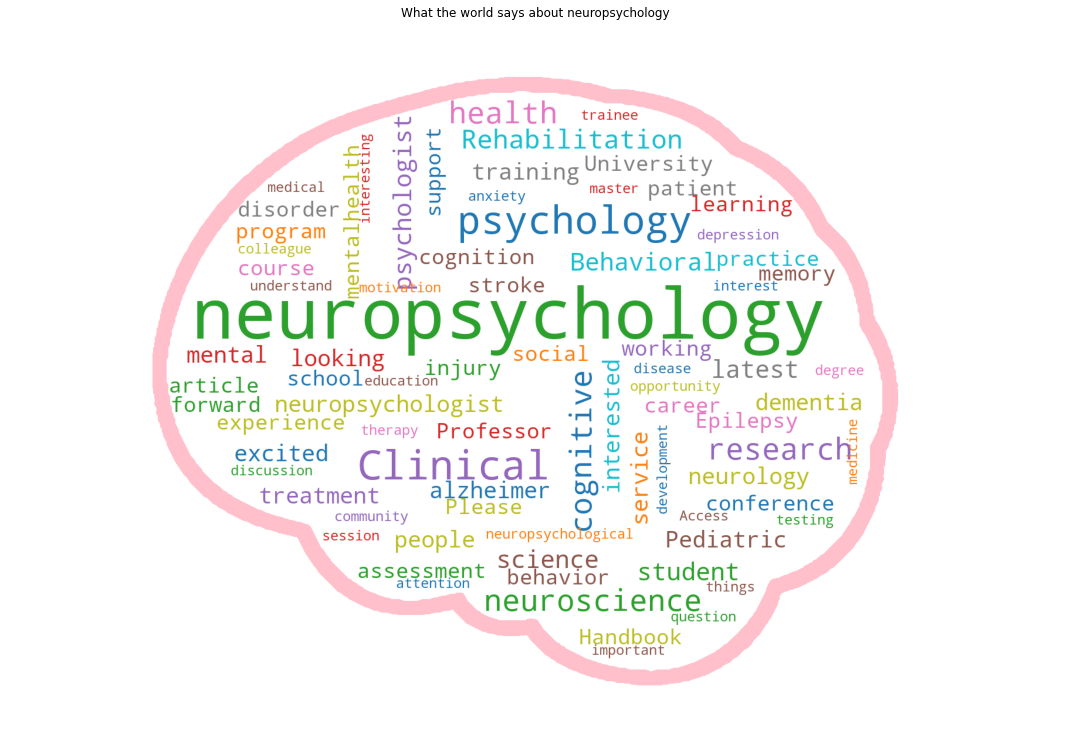

In [346]:
#Creating a wordcloud all tweets with the word neuropsychology in the last 6 months

text = cleaned_df

stopwords = set(STOPWORDS)

def nubeneuropsi(data, title = None, mask = None):
    wordcloud = WordCloud(collocations=False,              
                background_color='white',
                stopwords = [
                    'n', 's', 't', 'co', 'nhttps', 'm',
                    'amp', 'gt', 'lt', "https", 'neuropsych', 'neuropsycholog'
                    'c', 'neuropsychologycourse', 'nneuropsychology', 'Download', 'Arlington',
                    'Illinois', 'strathfield', 'Sydney', 'Heights', 'ArlingtonHeights',
                    'NeuropsychTwitter', 'Thanks', 'Really'
                ] + list(STOPWORDS),
                max_words=80,
                max_font_size=40,
                scale=3,
                random_state=1,
                colormap='tab10',
                contour_color='pink',
                contour_width=30,
                mask=mask
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(20, 10))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.title('What the world says about neuropsychology')
    plt.imshow(wordcloud)
    plt.tight_layout(pad=0)
    plt.show()
    wordcloud.to_file('neuropsychologyWC.png')
nubeneuropsi(cleaned_df['text'].dropna(), mask=earth_mask)
        


In [230]:
author_location_df = df1['author_location'].dropna()

author_location_df.head(5)


1             Boston, MA  USA
2    Yugambeh/Kombumerri land
3               Cambridge, MA
4               Cambridge, MA
5               Cambridge, MA
Name: author_location, dtype: object

In [243]:
author_location_df.apply(cleantext).head(3)


1              Boston,   
2    Yugambeh/Kombumerri 
3             Cambridge, 
Name: author_location, dtype: object

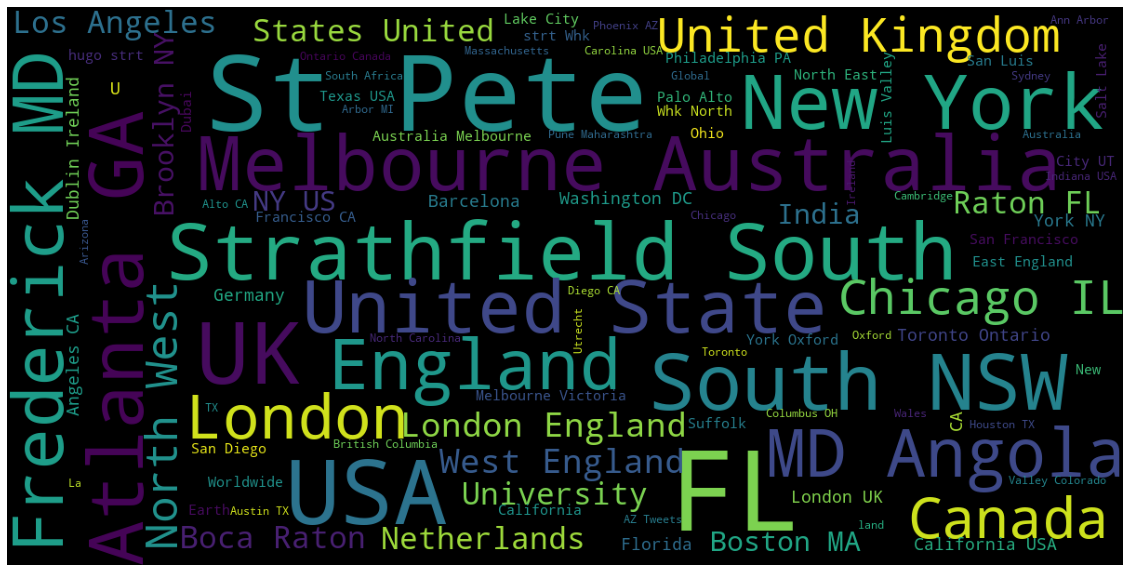

In [244]:
def Nube_Location(data, title = None):
    wordcloud = WordCloud(
                background_color='black',
                stopwords = ['Beach', "https", 'n', 's', 't', 'co', 'nhttps', 'm', 'amp', 'gt', 'lt'] + list(STOPWORDS),
                max_words=100,
                max_font_size=40,
                scale=3,
                random_state=1
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

Nube_Location(author_location_df.dropna())      